In [1]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

In [2]:
#this is borrowed from https://github.com/davideverona/deep-crowd-counting_crowdnet
import scipy.spatial

def gaussian_filter_density(gt):
    print(gt.shape)
    density = np.zeros(gt.shape, dtype=np.float32)
    gt_count = np.count_nonzero(gt)
    if gt_count == 0:
        return density

    pts = np.array(list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0])))
    leafsize = 2048
    # build kdtree
    tree = scipy.spatial.KDTree(pts.copy(), leafsize=leafsize)
    # query kdtree
    distances, locations = tree.query(pts, k=4)

    print('generate density...')
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    print('done.')
    return density

In [3]:
#set the root to the Shanghai dataset you download
root = 'D:\JupyterNotebook\CSRNet-pytorch-master\TRANCOS_v3'

In [4]:
images_path = os.path.join(root, 'images')
sets_path = os.path.join(root, 'image_sets')

In [5]:
train_img_paths = open(os.path.join(sets_path, 'training.txt')).readlines()
test_img_paths = open(os.path.join(sets_path, 'test.txt')).readlines()
validation_img_paths = open(os.path.join(sets_path, 'validation.txt')).readlines()

In [6]:
train_img_paths = list(map(lambda x: os.path.join(images_path, x[:-1]), train_img_paths))
test_img_paths = list(map(lambda x: os.path.join(images_path, x[:-1]), test_img_paths))
validation_img_paths = list(map(lambda x: os.path.join(images_path, x[:-1]), validation_img_paths))

In [38]:
import json
with open('train_images.json', 'w') as f:
    json.dump(train_img_paths, f)
    
with open('test_images.json', 'w') as f:
    json.dump(test_img_paths, f)
    
with open('validation_images.json', 'w') as f:
    json.dump(validation_img_paths, f)

In [8]:
import pandas as pd

In [28]:
for train_img_path in train_img_paths:
    ground_truth = pd.read_csv(train_img_path.replace('.jpg', '.txt'), delimiter='\t', names=['Y', 'X'])
    img = plt.imread(train_img_path)
    img_x = img.shape[0]
    img_y = img.shape[1]
    k = np.zeros((img_x, img_y))

    for i in range(len(ground_truth)):
        annote_x = int(ground_truth.iloc[i, 1])
        annote_y = int(ground_truth.iloc[i, 0])
        if annote_x<img_x and annote_y<img_y:
            k[annote_x, annote_y] = 1
    
    density = gaussian_filter_density(k)
    with h5py.File(train_img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
        hf['density'] = density

(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(

done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
d

In [10]:
density = gaussian_filter_density(k)

(480, 640)
generate density...
done.


In [40]:
for train_img_path in test_img_paths+validation_img_paths:
    ground_truth = pd.read_csv(train_img_path.replace('.jpg', '.txt'), delimiter='\t', names=['Y', 'X'])
    img = plt.imread(train_img_path)
    img_x = img.shape[0]
    img_y = img.shape[1]
    k = np.zeros((img_x, img_y))

    for i in range(len(ground_truth)):
        annote_x = int(ground_truth.iloc[i, 1])
        annote_y = int(ground_truth.iloc[i, 0])
        if annote_x<img_x and annote_y<img_y:
            k[annote_x, annote_y] = 1
    
    density = gaussian_filter_density(k)
    with h5py.File(train_img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
        hf['density'] = density

(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(

done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
d

done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
d

done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
done.
(480, 640)
generate density...
d

In [18]:
np.sum(density)

35.116295

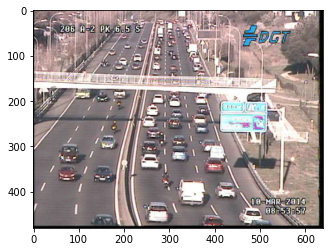

In [20]:
plt.imshow(img)

In [23]:
train_img_path.replace('.jpg','.h5').replace('images','ground_truth')

'D:\\JupyterNotebook\\CSRNet-pytorch-master\\TRANCOS_v3\\ground_truth\\image-1-000001.h5'

In [26]:
with h5py.File(train_img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
    hf['density'] = k

In [100]:
for img_path in img_paths:
    print(img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k

D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_1.jpg
(768, 1024)
generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_10.jpg
(683, 1024)
generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_100.jpg
(654, 1024)
generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_101.jpg
(768, 1024)
generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_102.jpg
(768, 1024)
generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_103.jpg
(400, 400)
generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_104.jpg
(405, 540)
generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_105.jpg
(632, 990)


generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_157.jpg
(450, 299)
generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_158.jpg
(671, 1024)
generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_159.jpg
(267, 400)
generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_16.jpg
(1024, 1024)
generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_160.jpg
(540, 1024)
generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_161.jpg
(480, 640)
generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_162.jpg
(480, 720)
generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\ima

done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_214.jpg
(359, 329)
generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_215.jpg
(298, 446)
generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_216.jpg
(293, 442)
generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_217.jpg
(325, 444)
generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_218.jpg
(411, 443)
generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_219.jpg
(282, 432)
generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_22.jpg
(630, 961)
generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_220.jpg
(377, 10

done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_272.jpg
(478, 359)
generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_273.jpg
(598, 1024)
generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_274.jpg
(681, 1024)
generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_275.jpg
(270, 360)
generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_276.jpg
(768, 1024)
generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_277.jpg
(692, 1024)
generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_278.jpg
(620, 620)
generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_279.jpg
(29

done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_6.jpg
(768, 1024)
generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_60.jpg
(768, 1024)
generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_61.jpg
(683, 1024)
generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_62.jpg
(340, 620)
generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_63.jpg
(768, 1024)
generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_64.jpg
(768, 1024)
generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_65.jpg
(683, 1024)
generate density...
done.
D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech\part_A\train_data\images\IMG_66.jpg
(768, 1024

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\JupyterNotebook\\CSRNet-pytorch-master\\ShanghaiTech\\part_A/test_data\\ground_truth\\GT_IMG_1.mat'

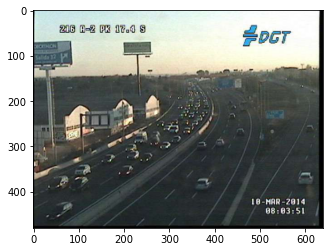

In [32]:
#now see a sample from ShanghaiA
plt.imshow(Image.open(train_img_paths[10]));

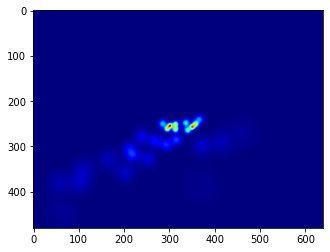

In [33]:
gt_file = h5py.File(train_img_paths[10].replace('.jpg','.h5').replace('images','ground_truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

In [36]:
np.sum(groundtruth)

26.931911

In [103]:
np.sum(groundtruth)# don't mind this slight variation

1543.841

In [104]:
#now generate the ShanghaiB's ground truth
path_sets = [part_B_train,part_B_test]

In [ ]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [ ]:
for img_path in img_paths:
    print img_path
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter(k,15)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k